<table align="left">
<tr>
  <td>
    <a target="_blank" href="https://github.com/SuperOdins/MachineLearningPractice/blob/main/RecommendationSystem/00.Recommendation_Pearson.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</tr>
<tr>
  <td>
    <a href="https://files.grouplens.org/datasets/movielens/ml-latest-small.zip" style="font-weight:bold;">1MB 파일 다운로드</a>
    <br>
    <a href="https://files.grouplens.org/datasets/movielens/ml-latest.zip" style="font-weight:bold;">335MB 파일 다운로드</a>    
  </td>
      
</tr>
<tr>
  <td>
  데이터는 아래 링크입니다.
  <br>
  1MB - https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
  <br>
  335MB - https://files.grouplens.org/datasets/movielens/ml-latest.zip

  </td>
</tr>
</table>

패키지 임포트

우리는 피어슨 상관계수를 이용해서 추천 시스템을 구현해봄

In [1]:
#!pip3 install seaborn

In [2]:
import pandas as pd 
import numpy as np
import os
import matplotlib as plt
import seaborn as sns
%matplotlib inline

컬럼 네임은 userId movieId, rating, timestamp
- userId 는 유저 
- movieId 는 영화 
- rating 은 점수(0~5)
- timestamp는 언제 

In [3]:
ratingData = pd.read_csv(f'./ratings.csv')
movieData = pd.read_csv(f'./movies.csv')

정상적으로 임포트 되었는지 상위 5개 출력

In [4]:
ratingData.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
movieData.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


MovieId를 기준으로 두개의 데이터프레임 합치기
- join이라고도 합니다.

In [6]:
MergedDataFarame = pd.merge(ratingData, movieData, on='movieId')
MergedDataFarame.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


1. 별점 레이팅 평균값으로 정렬해보기(아직 변수에 저장 안함)

In [7]:
MergedDataFarame.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
Gena the Crocodile (1969)              5.0
True Stories (1986)                    5.0
Cosmic Scrat-tastrophe (2015)          5.0
Love and Pigeons (1985)                5.0
Red Sorghum (Hong gao liang) (1987)    5.0
Name: rating, dtype: float64

2. 별점 레이팅 카운트로 정렬해보기(아직 변수에 저장 안함)

In [8]:
MergedDataFarame.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [9]:
ratings = pd.DataFrame(MergedDataFarame.groupby('title')['rating'].mean()) #정렬 안헀으니 순서대로 나오겠죠?
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


레이팅에 컬럼을 추가합시다.

In [10]:
ratings['Rating Count'] = pd.DataFrame(MergedDataFarame.groupby('title')['rating'].count())
ratings.head()

,rating,Rating Count
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


별점 받은 영화의 개수 추출해보기
- (bins = 몇개의 막대로 그래프로 표시할 것인가)

<Axes: >

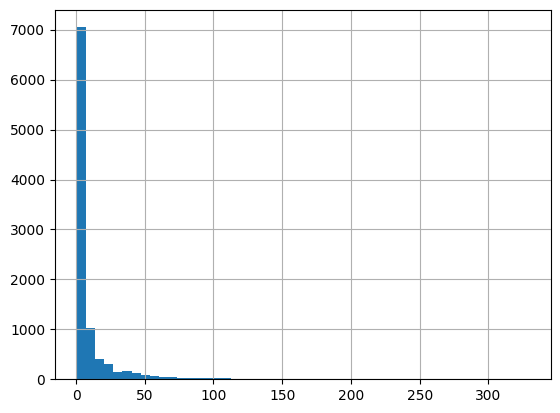

In [11]:
ratings['Rating Count'].hist(bins=50)

<Axes: xlabel='rating', ylabel='Count'>

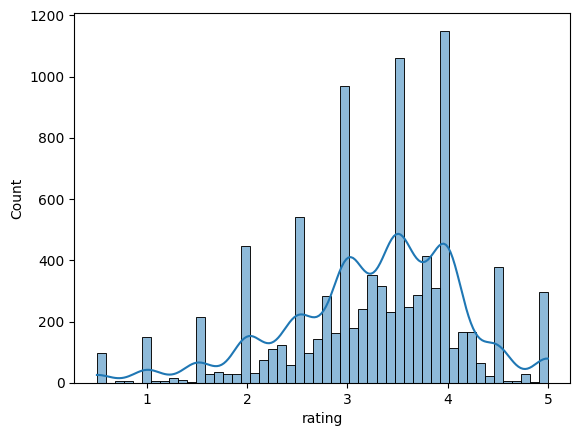

In [12]:
sns.histplot(ratings['rating'],kde=True, bins=50)

그래프 이쁘게 더 그려보기. 

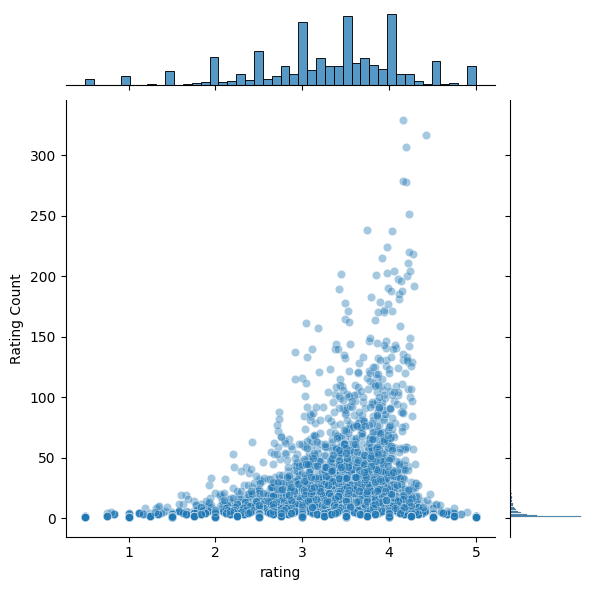

In [13]:
# plt.figure(figsize = (8,6))
plt.figure.Figure(figsize = (8,6))
sns.jointplot(x='rating', y='Rating Count', data=ratings, alpha=0.4)

유저별 본 영화에 따른 평점 데이터 프레임 만들기

In [14]:
UserMovieRatingData = MergedDataFarame.pivot_table(index='userId', columns ='title', values='rating')

In [15]:
UserMovieRatingData

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [16]:
ratings.sort_values(by='Rating Count', ascending=False).head()

,rating,Rating Count
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278


In [17]:
Forrest_Gump_Users = UserMovieRatingData['Forrest Gump (1994)'].fillna(0.0)

In [18]:
Forrest_Gump_Users

userId
1      4.0
2      0.0
3      0.0
4      0.0
5      0.0
      ... 
606    4.0
607    0.0
608    3.0
609    4.0
610    3.0
Name: Forrest Gump (1994), Length: 610, dtype: float64

"유저가 본 영화의 레이팅 데이터"과 "포레스트 검프"의 상관관계를 계산함 (피어슨 상관계수)
- 1: 두 영화의 평점이 완벽히 같은 경향을 보임
- 0: 두 영화의 평점이 서로 무관
- 1: 두 영화의 평점 경향이 완전히 반대

In [19]:
find_to_fg = UserMovieRatingData.corrwith(Forrest_Gump_Users) #fg = Forrest_Gump

c:\Python311\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Python311\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Python311\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [20]:
corr_fg = pd.DataFrame(find_to_fg, columns = ['Correlation']).dropna()

In [21]:
corr_fg

,Correlation
title,
'Til There Was You (1997),-1.000000
"'burbs, The (1989)",-0.190428
(500) Days of Summer (2009),-0.003295
*batteries not included (1987),0.200000
...And Justice for All (1979),0.928571
...,...
[REC]² (2009),-0.052414
eXistenZ (1999),0.271937
xXx (2002),0.414111


In [22]:
corr_fg.sort_values(by='Correlation', ascending=False)

,Correlation
title,
Dave Chappelle: For What it's Worth (2004),1.0
Time Lapse (2014),1.0
Rose Red (2002),1.0
Room in Rome (Habitación en Roma) (2010),1.0
The Great Train Robbery (1903),1.0
...,...
"Comebacks, The (2007)",-1.0
Spies Like Us (1985),-1.0
Marwencol (2010),-1.0


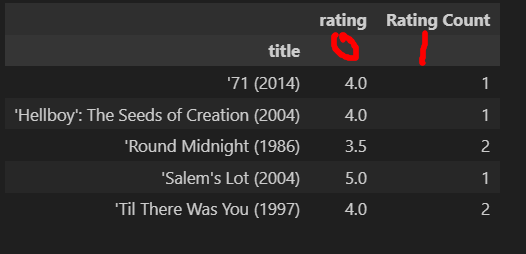
-  두 번째 열(1번 인덱스) 즉 Rating Count를 선택

In [23]:
Total_Fg = corr_fg.join(ratings.iloc[:,1])

레이팅 카운트가 5개 초과이고 포레스트 검프가 아닌 것만 추출하여 정렬함. 
<br>
(판교사투리로는 Total_Fg에서 포검뺸걸 익스트랙트(Extract/Export)해서 소팅(Sorting)하면 되잖아? 이라고 얘기함)

In [36]:
SimilarMovie=Total_Fg[(Total_Fg['Rating Count']>10) & (Total_Fg.index != 'Forrest Gump (1994)')].sort_values(by='Correlation', ascending=False).head(10)
SimilarMovie

,Correlation,Rating Count
title,,
On Golden Pond (1981),0.849850,13
Queen of the Damned (2002),0.818631,11
Father of the Bride (1991),0.790564,13
Spanglish (2004),0.753767,11
Shoot 'Em Up (2007),0.707585,12
"World's End, The (2013)",0.706727,18
Orange County (2002),0.675205,15
Cold Mountain (2003),0.665959,12
"Big Blue, The (Grand bleu, Le) (1988)",0.664970,11


In [37]:
SimilarMovie['Title'] = SimilarMovie.index
SimilarMovie['index'] = list(range(len(SimilarMovie.index)))
SimilarMovie

,Correlation,Rating Count,Title,index
title,,,,
On Golden Pond (1981),0.849850,13,On Golden Pond (1981),0
Queen of the Damned (2002),0.818631,11,Queen of the Damned (2002),1
Father of the Bride (1991),0.790564,13,Father of the Bride (1991),2
Spanglish (2004),0.753767,11,Spanglish (2004),3
Shoot 'Em Up (2007),0.707585,12,Shoot 'Em Up (2007),4
"World's End, The (2013)",0.706727,18,"World's End, The (2013)",5
Orange County (2002),0.675205,15,Orange County (2002),6
Cold Mountain (2003),0.665959,12,Cold Mountain (2003),7
"Big Blue, The (Grand bleu, Le) (1988)",0.664970,11,"Big Blue, The (Grand bleu, Le) (1988)",8


In [38]:
SimilarMovie.set_index('index')

,Correlation,Rating Count,Title
index,,,
0,0.849850,13,On Golden Pond (1981)
1,0.818631,11,Queen of the Damned (2002)
2,0.790564,13,Father of the Bride (1991)
3,0.753767,11,Spanglish (2004)
4,0.707585,12,Shoot 'Em Up (2007)
5,0.706727,18,"World's End, The (2013)"
6,0.675205,15,Orange County (2002)
7,0.665959,12,Cold Mountain (2003)
8,0.664970,11,"Big Blue, The (Grand bleu, Le) (1988)"


(0.0, 1.0)

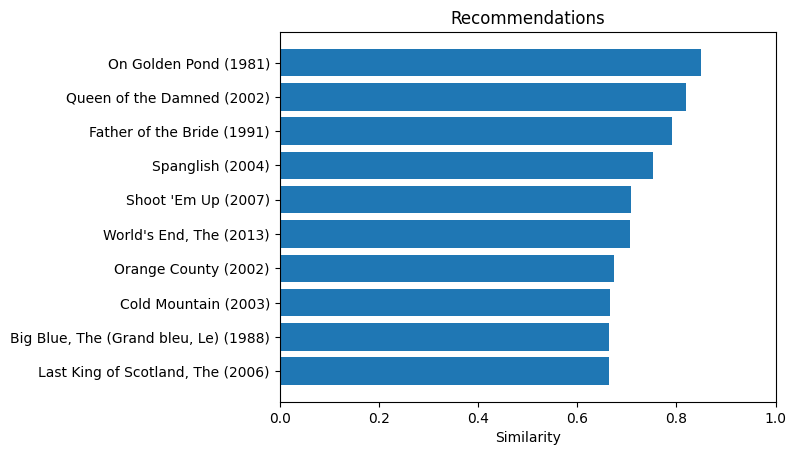

In [39]:
plt.figure.Figure(figsize=(12,4))

plt.pyplot.barh(SimilarMovie['Title'], SimilarMovie['Correlation'], align='center')
plt.pyplot.gca().invert_yaxis()
plt.pyplot.xlabel("Similarity")
plt.pyplot.title("Recommendations")
plt.pyplot.xlim([0,1])
